In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 200,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8580246913580247, Loss: 0.5323145477860062
Checkpoint 20, Accuracy: 0.8518518518518519, Loss: 0.5134915952329282
Checkpoint 30, Accuracy: 0.8765432098765432, Loss: 0.5314689918800637
Checkpoint 40, Accuracy: 0.8888888888888888, Loss: 0.4500429012157299
Checkpoint 50, Accuracy: 0.8827160493827161, Loss: 0.36658477783203125
Checkpoint 60, Accuracy: 0.8950617283950617, Loss: 0.316947548477738
Checkpoint 70, Accuracy: 0.9567901234567902, Loss: 0.29458946651882595
Checkpoint 80, Accuracy: 0.9629629629629629, Loss: 0.2262464099460178
Checkpoint 90, Accuracy: 0.9753086419753086, Loss: 0.19954646075213398
Checkpoint 100, Accuracy: 0.9629629629629629, Loss: 0.1736067842554163
Checkpoint 110, Accuracy: 0.9567901234567902, Loss: 0.16626084292376483
Checkpoint 120, Accuracy: 0.9629629629629629, Loss: 0.16595681508382162
Checkpoint 130, Accuracy: 0.9691358024691358, Loss: 0.14216791258917916
Checkpoint 140, Accuracy: 0.9629629629629629, Loss: 0.13183853361341688
Checkpoin

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

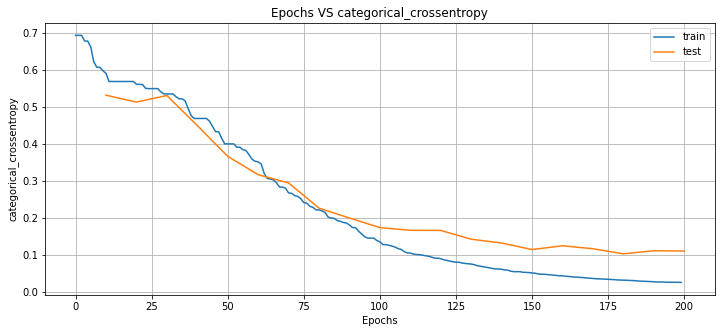

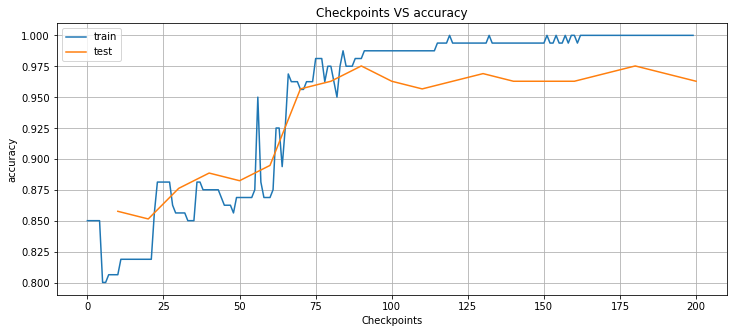

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [9.9644357e-01 9.6175994e-04 2.5946761e-03]
[1. 0. 0.] <-> [0.99341935 0.00140616 0.00517447]
[0. 1. 0.] <-> [8.6841136e-03 9.9126863e-01 4.7248828e-05]
[1. 0. 0.] <-> [9.9598265e-01 9.6266688e-04 3.0547280e-03]
[1. 0. 0.] <-> [0.99005216 0.00867546 0.00127237]
[1. 0. 0.] <-> [0.9974171  0.0011761  0.00140688]
[1. 0. 0.] <-> [0.990893   0.00657433 0.00253267]
[1. 0. 0.] <-> [0.9949935  0.00100061 0.00400587]
[0. 1. 0.] <-> [0.26108    0.73801255 0.00090744]
[1. 0. 0.] <-> [0.86899203 0.00156848 0.1294394 ]
[1. 0. 0.] <-> [9.9364305e-01 8.9198322e-04 5.4649794e-03]
[1. 0. 0.] <-> [0.9970636  0.00128874 0.00164768]
[0. 1. 0.] <-> [1.4573122e-02 9.8535341e-01 7.3506220e-05]
[1. 0. 0.] <-> [0.9945251  0.00407848 0.00139645]
[0. 1. 0.] <-> [1.2881455e-01 8.7072760e-01 4.5790110e-04]
[0. 1. 0.] <-> [8.2053253e-03 9.9175006e-01 4.4565928e-05]
[1. 0. 0.] <-> [0.92654115 0.00232873 0.07113002]
[1. 0. 0.] <-> [0.4864116  0.00117361 0.51241475]
[0. 1. 0.] <-> [8.2194917e-03 9.91736

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8580246913580247, 'mean_square_error': 0.28678261034732916, 'categorical_crossentropy': 0.5323145477860062, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 23, 'tn_hit': 5, 'fn_hit': 0}, 1: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 11}, 2: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 12}}, 'checkpoint': 10} 


{'accuracy': 0.8518518518518519, 'mean_square_error': 0.2777022485205594, 'categorical_crossentropy': 0.5134915952329282, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 24, 'tn_hit': 4, 'fn_hit': 0}, 1: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 11}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 13}}, 'checkpoint': 20} 


{'accuracy': 0.8765432098765432, 'mean_square_error': 0.2923159035760542, 'categorical_crossentropy': 0.5314689918800637, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 15, 'tn_hit': 13, 'fn_hit': 2}, 1: {'tp_hit': 9, 'fp_hit': 2, 'tn_hit': 91, 'fn_hit': 6}, 2: {'tp_hit': 1, 'fp_hit': 3, 'tn_hit': 92, 'fn_hit

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[ 1.5530267 -2.77048   -1.4941666  3.         1.1680839]
 bias: 3.0

Neuron 1: weights:
[-0.27657038  3.          1.36194    -1.0766542  -3.        ]
 bias: 3.0

Neuron 2: weights:
[ 2.055167  -3.        -2.793006  -1.4988555  3.       ]
 bias: 3.0

Neuron 3: weights:
[-0.14365217 -3.          0.98344606  1.9910063   3.        ]
 bias: -2.088148593902588

$
Layer 2
Neuron 0: weights:
[ 3.  3.  3. -3.]
 bias: -2.2588977813720703

Neuron 1: weights:
[-3.        3.       -3.       -1.215105]
 bias: 2.533252716064453

Neuron 2: weights:
[ 3.        -3.         1.4131029  3.       ]
 bias: -1.4835333824157715

$

